In [1]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
import networkx as nx

path = "Data/"

nets = []
nets_index = [str(i) for i in range(1992, 2003)]
for index in nets_index:
    gml_file = path + 'WDN_' +index +".txt.graphml"
    G = nx.read_graphml(gml_file)
    nets.append(G)
figure_index = 10
def new_figure():
    global figure_index
    plt.figure(figure_index)
    figure_index+=1

In [3]:
### A06.1 code
def avg_nets_clustering(nets):
    clustering_coes = []
    for G in nets:
        clustering_coes.append(nx.average_clustering(G))
    return clustering_coes
def avg_nets_reciprocity(nets):
    reci_coes = []
    for G in nets:
        reci_coes.append(nx.reciprocity(G))
    return reci_coes
def output(nets):
    clusterings = avg_nets_clustering(nets)
    reciprocities = avg_nets_reciprocity(nets)
    for i in range(0, len(nets_index)):
        print("WDN_"+nets_index[i])
        print("average_clustering: " , clusterings[i])
        print("reciprocities: ", reciprocities[i])
        print("\n")

In [4]:
sample_count = 10
max_relative_error_strength = 0.01
def sample_UBCM(G:nx.Graph, output_path):
    g_array = nx.to_numpy_array(G.to_undirected())
    UG = UndirectedGraph(g_array)
    UG.solve_tool(model="cm_exp")
    global sample_count
    UG.ensemble_sampler(sample_count, cpu_n=1, output_dir=output_path)

def sample_DBCM(G, output_path):
    g_array = nx.to_numpy_array(G)
    DG = DirectedGraph(g_array)
    DG.solve_tool(model="dcm_exp")

    global sample_count
    DG.ensemble_sampler(sample_count, cpu_n=1, output_dir=output_path)

def extract_samples(path, directed):
    nets = []
    global sample_count
    for i in range(sample_count):
        file = path + str(i) + ".txt"
        edges = np.loadtxt(file)
        if (directed):
            G = nx.from_numpy_array(build_adjacency_from_edgelist(edgelist = edges,
                                                                  is_directed = True,
                                                                  is_sparse = False,
                                                                  is_weighted = True),
                                    create_using=nx.DiGraph)
            nets.append(G)
        else:
            edges = np.loadtxt(file)
            G = nx.from_numpy_array(build_adjacency_from_edgelist(edges,is_directed = False,
                                                                  is_sparse = False,
                                                                  is_weighted = True))
            nets.append(G)
    return nets

def origin_vs_sample(nets):
    original_clustering_t = []
    original_undirected_clustering_t= []
    original_reci_t = []

    undirected_sample_clustering_t = []
    directed_sample_clustering_t =[]
    sample_reci_t = []

    for i in range(len(nets_index)):
        G = nets[i]

        original_clustering_t.append(nx.average_clustering(G))
        original_reci_t.append(nx.average_clustering(G))
        original_undirected_clustering_t.append(nx.average_clustering(G.to_undirected()))

        DBCM_path="sample_DBCM_" + nets_index[i] + "/"
        UBCM_path="sample_UBCM_" + nets_index[i] + "/"

        sample_UBCM(G, UBCM_path)
        sample_DBCM(G, DBCM_path)
        DBCM_samples = extract_samples(DBCM_path, True)
        UBCM_samples = extract_samples(UBCM_path, False)


        undirected_sample_clusterings=[]
        for sample in UBCM_samples:
            undirected_sample_clusterings.append(nx.average_clustering(sample))
        undirected_sample_clustering_t.append(np.mean(undirected_sample_clusterings))

        directed_sample_clusterings = []
        sample_reciprocities = []
        for sample in DBCM_samples:
            directed_sample_clusterings.append(nx.average_clustering(sample))
            sample_reciprocities.append(nx.reciprocity(sample))
        directed_sample_clustering_t.append(np.mean(directed_sample_clusterings))
        sample_reci_t.append(np.mean(sample_reciprocities))

    return original_undirected_clustering_t, undirected_sample_clustering_t, original_clustering_t, directed_sample_clustering_t, original_reci_t,sample_reci_t

original_undirected_clustering_t, undirected_sample_clustering_t, original_clustering_t, directed_sample_clustering_t, original_reci_t, sample_reci_t = origin_vs_sample(nets)

C:\Users\zhaog\anaconda3\lib\site-packages\numba\core\utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
C:\Users\zhaog\anaconda3\lib\site-packages\NEMtropy\models_functions.py:461: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
C:\Users\zhaog\anaconda3\lib\site-packages\NEMtropy\models_functions.py:462: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
C:\Users\zhaog\anaconda3\lib\site-packages\numba\core\utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 7.323535555769922e-09


C:\Users\zhaog\anaconda3\lib\site-packages\numba\core\utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
C:\Users\zhaog\anaconda3\lib\site-packages\NEMtropy\models_functions.py:3181: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
C:\Users\zhaog\anaconda3\lib\site-packages\NEMtropy\models_functions.py:3182: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
C:\Users\zhaog\anaconda3\lib\site-packages\numba\core\utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 1.870745336418622e-09


C:\Users\zhaog\anaconda3\lib\site-packages\numba\core\utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 4.7442654249607585e-09

solution error = 4.961201227615675e-09

solution error = 4.038980705445283e-09

solution error = 4.1926213611986896e-09

solution error = 2.780694785542437e-09

solution error = 4.125070063309977e-09

solution error = 2.51287701757974e-09

solution error = 2.9767477371933637e-09

solution error = 1.204313093694509e-09

solution error = 3.0930209504731465e-09

solution error = 2.741387561400188e-09

solution error = 2.580478053459956e-09

solution error = 9.668212896940531e-10

solution error = 3.283503247075714e-09

solution error = 2.9986892968736356e-09

solution error = 2.0570354308802052e-09

solution error = 4.6516106522176415e-09

solution error = 6.056023238443231e-09

solution error = 1.9470292045298265e-09

solution error = 3.8544101244042395e-09


### A06.1  - 1 coefficients

In [5]:
output(nets)

WDN_1992
average_clustering:  0.8021364732946835
reciprocities:  0.367340010185028


WDN_1993
average_clustering:  0.7826552252417198
reciprocities:  0.430931744312026


WDN_1994
average_clustering:  0.778118724128831
reciprocities:  0.541138903672166


WDN_1995
average_clustering:  0.769316598518603
reciprocities:  0.6043664931031333


WDN_1996
average_clustering:  0.779859983253989
reciprocities:  0.6482433229421182


WDN_1997
average_clustering:  0.7844618494148852
reciprocities:  0.6822429906542056


WDN_1998
average_clustering:  0.7913458153848136
reciprocities:  0.7015887290167866


WDN_1999
average_clustering:  0.7946922756897296
reciprocities:  0.716582186821144


WDN_2000
average_clustering:  0.7928732278480053
reciprocities:  0.7232351897836112


WDN_2001
average_clustering:  0.8020845961993215
reciprocities:  0.7375525101577026


WDN_2002
average_clustering:  0.7955013137787762
reciprocities:  0.7041909280425562




### A06.1 - 3 plot

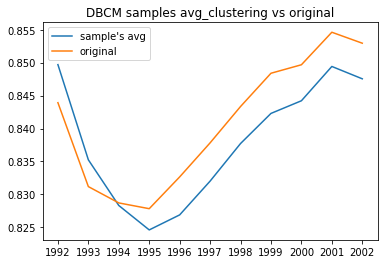

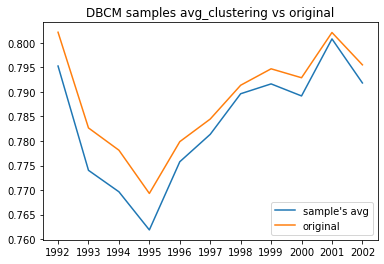

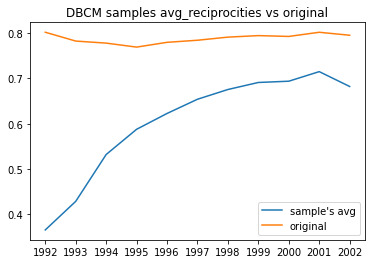

In [6]:
new_figure()
plt.title("DBCM samples avg_clustering vs original")
plt.plot(nets_index, undirected_sample_clustering_t, label = "sample's avg")
plt.plot(nets_index, original_undirected_clustering_t, label = "original")
plt.legend()

new_figure()
plt.title("DBCM samples avg_clustering vs original")
plt.plot(nets_index, directed_sample_clustering_t, label = "sample's avg")
plt.plot(nets_index, original_clustering_t, label = "original")
plt.legend()

new_figure()
plt.title("DBCM samples avg_reciprocities vs original")
plt.plot(nets_index, sample_reci_t, label = "sample's avg")
plt.plot(nets_index, original_reci_t, label = "original")
plt.legend()

In [7]:
### A06.2 code
def strength_assortativity_coefficient(nets):
    sac_list = []
    for G in nets:
        sac_list.append(nx.degree_pearson_correlation_coefficient(G, weight='weight'))
    return sac_list

def weighted_output(nets):
    sac_list = strength_assortativity_coefficient(nets)
    for i in range(0, len(nets_index)):
        print("WDN_"+nets_index[i])
        print("strength_assortativity_coefficient: " , sac_list[i])
        print("\n")

In [9]:
def weighted_sample_UECM(G, output_path):
    g_array = nx.to_numpy_array(G.to_undirected())

    UG = UndirectedGraph(g_array)
    UG.solve_tool(model="crema",
                  method="newton",
                  initial_guess="random",
                  adjacency="cm_exp",
                  method_adjacency="newton")
    ## increase step until finding a small enough relative_error_strength
    global max_relative_error_strength
    step = 200
    current_max = 100
    while UG.relative_error_strength > max_relative_error_strength:
        current_max+=step
        UG.solve_tool(model="crema",
                      method="newton",
                      initial_guess="random",
                      adjacency="cm_exp",
                      method_adjacency="newton", max_steps=current_max)
    print(UG.relative_error_strength)

    global sample_count
    UG.ensemble_sampler(sample_count, cpu_n=1, output_dir=output_path)

def weighted_sample_DECM(G, output_path):
    g_array = nx.to_numpy_array(G)
    DG = DirectedGraph(g_array)
    DG.solve_tool(model="crema",
                  method="newton",
                  initial_guess="random",
                  adjacency="dcm_exp",
                  method_adjacency="newton")
    global max_relative_error_strength
    step = 200
    current_max = 100
    while DG.relative_error_strength > max_relative_error_strength:
        current_max+=step
        DG.solve_tool(model="crema",
                  method="newton",
                  initial_guess="random",
                  adjacency="dcm_exp",
                  method_adjacency="newton", max_steps=current_max)
    print(DG.relative_error_strength)

    global sample_count
    DG.ensemble_sampler(sample_count, cpu_n=1, output_dir=output_path)

def extract_weighted_samples(path, directed):
    nets = []
    global sample_count
    for i in range(sample_count):
        file = path + str(i) + ".txt"
        edges = np.loadtxt(file)
        if (directed):
            G = nx.from_numpy_array(build_adjacency_from_edgelist(edgelist = edges,
                                                                  is_directed = True,
                                                                  is_sparse = False,
                                                                  is_weighted = True),
                                    create_using=nx.DiGraph)
            nets.append(G)
        else:
            edges = np.loadtxt(file)
            G = nx.from_numpy_array(build_adjacency_from_edgelist(edges,is_directed = False,
                                                                  is_sparse = False,
                                                                  is_weighted = True))
            nets.append(G)
    return nets

def origin_vs_weighted_sample(nets):
    original_undirected_sac = []
    original_in_in_directed_sac = []
    original_in_out_directed_sac = []
    original_out_out_directed_sac = []

    undirected_avg_sample_sac=[]
    directed_avg_in_in_sample_sac = []
    directed_avg_in_out_sample_sac = []
    directed_avg_out_out_sample_sac = []
    for i in range(len(nets_index)):
        G = nets[i]
        original_undirected_sac.append(nx.degree_assortativity_coefficient(G.to_undirected(),  weight='weight'))
        original_in_out_directed_sac.append(nx.degree_pearson_correlation_coefficient(G, x="in", y="out", weight='weight'))
        original_in_in_directed_sac.append(nx.degree_pearson_correlation_coefficient(G, x="in", y="in", weight='weight'))
        original_out_out_directed_sac.append(nx.degree_pearson_correlation_coefficient(G, x="out", y="out", weight='weight'))

        weighted_UECM_path= "sample_UECM_" + nets_index[i] + "/"
        weighted_sample_UECM(G,weighted_UECM_path)

        weighted_DECM_path = "sample_DECM_" + nets_index[i] + "/"
        weighted_sample_DECM(G, weighted_DECM_path)

        undirected_samples = extract_weighted_samples(weighted_UECM_path, False)
        undirected_samples_sac = []
        for sample in undirected_samples:
            undirected_samples_sac.append(nx.degree_assortativity_coefficient(sample))
        undirected_avg_sample_sac.append(np.mean(undirected_samples_sac))

        weighted_samples = extract_weighted_samples(weighted_DECM_path, True)

        directed_in_in_sample_sac = []
        directed_in_out_sample_sac = []
        directed_out_out_sample_sac = []
        for weighted_sample in weighted_samples:
            directed_in_out_sample_sac.append(nx.degree_pearson_correlation_coefficient(weighted_sample, x="in", y="out", weight='weight'))
            directed_in_in_sample_sac.append(nx.degree_pearson_correlation_coefficient(weighted_sample, x="in", y="in", weight='weight'))
            directed_out_out_sample_sac.append(nx.degree_pearson_correlation_coefficient(weighted_sample, x="out", y="out", weight='weight'))
        directed_avg_in_in_sample_sac.append(np.mean(directed_in_in_sample_sac))
        directed_avg_in_out_sample_sac.append(np.mean(directed_in_out_sample_sac))
        directed_avg_out_out_sample_sac.append(np.mean(directed_out_out_sample_sac))

    return original_undirected_sac, undirected_avg_sample_sac, original_in_in_directed_sac,directed_avg_in_in_sample_sac,original_in_out_directed_sac,directed_avg_in_out_sample_sac,original_out_out_directed_sac ,directed_avg_out_out_sample_sac
original_undirected_sac, undirected_avg_sample_sac, original_in_in_directed_sac,directed_avg_in_in_sample_sac,original_in_out_directed_sac,directed_avg_in_out_sample_sac,original_out_out_directed_sac ,directed_avg_out_out_sample_sac = origin_vs_weighted_sample(nets)

C:\Users\zhaog\anaconda3\lib\site-packages\numba\core\utils.py:451: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 351659451279.33875

solution error = 352726670221.0042

solution error = 306914338109.9834

solution error = 123959017276.3356

solution error = 0.41223164787516
1.1743414076405525e-07

solution error = 342057922221.5401

solution error = 339749835191.6042

solution error = 331109706487.4485

solution error = 276845801223.1081

solution error = 189630882480.966

solution error = 1060761.7469482422
6.45370159319716e-05

solution error = 297684140794.90283

solution error = 384510210265.4139

solution error = 335834087131.2062

solution error = 175504214389.71887

solution error = 0.02849205955862999
8.170051987088865e-09

solution error = 360863583538.9091

solution error = 359511449705.01483

solution error = 351160544958.60815

solution error = 333584304326.7897

solution error = 182197556835.44308

solution error = 41916928672.38269

solution error = 395181.29693603516
8.226995607646722e-06

solution error = 233880934417.65814

solution error = 371494622468.53644

s

In [10]:
weighted_output(nets)

WDN_1992
strength_assortativity_coefficient:  -0.059869793086991134


WDN_1993
strength_assortativity_coefficient:  -0.07202068872957708


WDN_1994
strength_assortativity_coefficient:  -0.0802250161794802


WDN_1995
strength_assortativity_coefficient:  -0.07830645801950627


WDN_1996
strength_assortativity_coefficient:  -0.07535502512416231


WDN_1997
strength_assortativity_coefficient:  -0.07171683897072358


WDN_1998
strength_assortativity_coefficient:  -0.06572057397949527


WDN_1999
strength_assortativity_coefficient:  -0.06546711179930181


WDN_2000
strength_assortativity_coefficient:  -0.06539073425903157


WDN_2001
strength_assortativity_coefficient:  -0.06192625961852661


WDN_2002
strength_assortativity_coefficient:  -0.06303814946654548




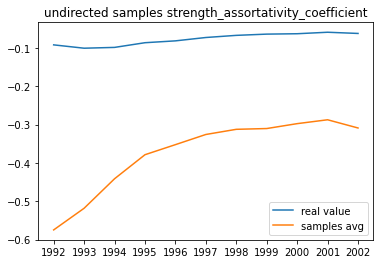

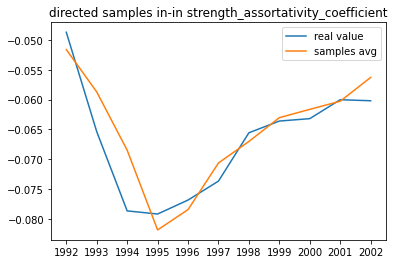

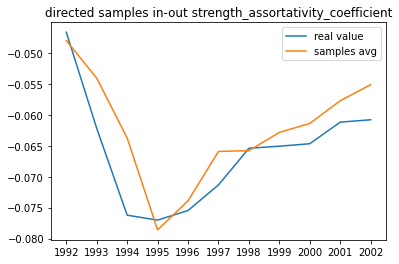

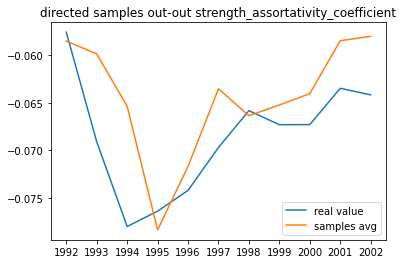

In [11]:
new_figure()
plt.title("undirected samples strength_assortativity_coefficient")
plt.plot(nets_index, original_undirected_sac, label="real value")
plt.plot(nets_index, undirected_avg_sample_sac, label="samples avg")
plt.legend()

new_figure()
plt.title("directed samples in-in strength_assortativity_coefficient")
plt.plot(nets_index, original_in_in_directed_sac, label="real value")
plt.plot(nets_index, directed_avg_in_in_sample_sac, label="samples avg")
plt.legend()

new_figure()
plt.title("directed samples in-out strength_assortativity_coefficient")
plt.plot(nets_index, original_in_out_directed_sac, label="real value")
plt.plot(nets_index, directed_avg_in_out_sample_sac, label="samples avg")
plt.legend()

new_figure()
plt.title("directed samples out-out strength_assortativity_coefficient")
plt.plot(nets_index, original_out_out_directed_sac, label="real value")
plt.plot(nets_index, directed_avg_out_out_sample_sac, label="samples avg")
plt.legend()

